In [30]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

#### Conhecendo os Dados

In [31]:
data = pd.read_csv("data/stressEcho.csv")

In [32]:
print(data.head())
print(data.tail())

   Unnamed: 0  bhr  basebp  basedp  pkhr  sbp     dp  dose  maxhr  pctMphr  \
0           1   92     103    9476   114   86   9804    40    100       74   
1           2   62     139    8618   120  158  18960    40    120       82   
2           3   62     139    8618   120  157  18840    40    120       82   
3           4   93     118   10974   118  105  12390    30    118       72   
4           5   89     103    9167   129  173  22317    40    129       69   

   ...  newCABG  death  hxofHT  hxofDM     hxofCig  hxofMI  hxofPTCA  \
0  ...        0      0       0       0  non-smoker       1         1   
1  ...        0      0       0       1  non-smoker       1         0   
2  ...        0      0       0       1  non-smoker       1         0   
3  ...        0      0       0       0  non-smoker       0         0   
4  ...        0      0       0       0  non-smoker       0         0   

   hxofCABG  any.event        ecg  
0         0          0     normal  
1         0          1  eq

In [33]:
data.drop(columns=['Unnamed: 0'], inplace=True)

#### Nosso dados carregados

In [34]:
data.head()

,bhr,basebp,basedp,pkhr,sbp,dp,dose,maxhr,pctMphr,mbp,...,newCABG,death,hxofHT,hxofDM,hxofCig,hxofMI,hxofPTCA,hxofCABG,any.event,ecg
0,92,103,9476,114,86,9804,40,100,74,121,...,0,0,0,0,non-smoker,1,1,0,0,normal
1,62,139,8618,120,158,18960,40,120,82,158,...,0,0,0,1,non-smoker,1,0,0,1,equivocal
2,62,139,8618,120,157,18840,40,120,82,157,...,0,0,0,1,non-smoker,1,0,0,1,equivocal
3,93,118,10974,118,105,12390,30,118,72,105,...,0,0,0,0,non-smoker,0,0,0,0,normal
4,89,103,9167,129,173,22317,40,129,69,176,...,0,0,0,0,non-smoker,0,0,0,0,equivocal


#### Resumo Estatísticos Das Variáveis

In [35]:
data.describe()

,bhr,basebp,basedp,pkhr,sbp,dp,dose,maxhr,pctMphr,mbp,...,newMI,newPTCA,newCABG,death,hxofHT,hxofDM,hxofMI,hxofPTCA,hxofCABG,any.event
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.00000,558.000000,558.000000,558.000000,...,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,75.290323,135.324373,10181.313620,120.550179,146.915771,17633.844086,33.75448,119.369176,78.569892,156.000000,...,0.050179,0.048387,0.059140,0.043011,0.704301,0.369176,0.275986,0.073477,0.157706,0.159498
std,15.415197,20.770106,2579.749367,22.567835,36.529544,5220.533978,8.13479,21.907179,15.121101,31.705671,...,0.218510,0.214775,0.236098,0.203063,0.456766,0.483015,0.447411,0.261151,0.364792,0.366469
min,42.000000,85.000000,5000.000000,52.000000,40.000000,5100.000000,10.00000,58.000000,38.000000,84.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,120.000000,8400.000000,106.250000,120.000000,14033.000000,30.00000,104.250000,69.000000,133.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74.000000,133.000000,9792.000000,122.000000,141.000000,17060.000000,40.00000,120.000000,78.000000,150.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,84.000000,150.000000,11663.250000,135.000000,170.000000,20644.500000,40.00000,133.000000,88.000000,175.750000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,210.000000,203.000000,27300.000000,210.000000,309.000000,45114.000000,40.00000,200.000000,133.000000,309.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Verificação de Valores Nulos

In [36]:
print(data.isnull().sum())

bhr          0
basebp       0
basedp       0
pkhr         0
sbp          0
dp           0
dose         0
maxhr        0
pctMphr      0
mbp          0
dpmaxdo      0
dobdose      0
age          0
gender       0
baseEF       0
dobEF        0
chestpain    0
restwma      0
posSE        0
newMI        0
newPTCA      0
newCABG      0
death        0
hxofHT       0
hxofDM       0
hxofCig      0
hxofMI       0
hxofPTCA     0
hxofCABG     0
any.event    0
ecg          0
dtype: int64


#### Como não temos valores nulos podemos partir para a análise exploratória

#### Para Variáveis Numéricas:

In [114]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Supondo que 'data' seja o DataFrame já carregado com seus dados

# Selecionar colunas numéricas
numeric_cols = data.select_dtypes(include=[float, int]).columns

# Criar subplots - ajustando o número de linhas e colunas com base no número de variáveis numéricas
num_cols = 3  # Número de colunas que você deseja no grid
num_rows = -(-len(numeric_cols) // num_cols)  # Calculando o número de linhas necessárias

# Criar a figura dos subplots
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=numeric_cols)

# Adicionar cada histograma aos subplots
for i, column in enumerate(numeric_cols):
    row = i // num_cols + 1
    col = i % num_cols + 1
    fig.add_trace(go.Histogram(x=data[column], name=column), row=row, col=col)

# Atualizar layout
fig.update_layout(height=300*num_rows, width=1000, title_text="Histogramas Gerais", showlegend=False)

# Mostrar figura
fig.show()


Distribuição Normal ou Assimétrica:

Se o histograma de uma variável apresentar uma forma de sino, isso indica uma distribuição normal.
Distribuições assimétricas (skewed) podem ser à esquerda (valores concentrados no lado direito) ou à direita (valores concentrados no lado esquerdo).
Picos e Modos:

Múltiplos picos indicam uma distribuição multimodal, sugerindo a presença de subgrupos distintos dentro dos dados.
Dados Concentrados ou Espalhados:

A largura do histograma mostra a variabilidade da variável. Histogramas estreitos indicam pouca variabilidade, enquanto histogramas largos indicam alta variabilidade.

In [115]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Supondo que 'data' seja o DataFrame já carregado com seus dados

# Selecionar colunas numéricas
numeric_cols = data.select_dtypes(include=[float, int]).columns

# Criar subplots - ajustando o número de linhas e colunas com base no número de variáveis numéricas
num_cols = 3  # Número de colunas que você deseja no grid
num_rows = -(-len(numeric_cols) // num_cols)  # Calculando o número de linhas necessárias

# Criar a figura dos subplots
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=numeric_cols)

# Adicionar cada boxplot aos subplots
for i, column in enumerate(numeric_cols):
    row = i // num_cols + 1
    col = i % num_cols + 1
    fig.add_trace(go.Box(y=data[column], name=column), row=row, col=col)

# Atualizar layout
fig.update_layout(height=300*num_rows, width=1000, title_text="Boxplots Gerais", showlegend=False)

# Mostrar figura
fig.show()


In [116]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Supondo que 'data' seja o DataFrame já carregado com seus dados

# Lista de variáveis numéricas
numeric_vars = ['bhr', 'basebp', 'basedp', 'pkhr', 'sbp', 'dp', 'dose', 
                'maxhr', 'pctMphr', 'mbp', 'dpmaxdo', 'dobdose', 'age', 
                'baseEF', 'dobEF']

# Criar subplots - ajustando o número de linhas e colunas com base no número de variáveis numéricas
num_cols = 3  # Número de colunas que você deseja no grid
num_rows = -(-len(numeric_vars) // num_cols)  # Calculando o número de linhas necessárias

# Criar a figura dos subplots
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=numeric_vars)

# Adicionar cada histograma aos subplots
for i, column in enumerate(numeric_vars):
    row = i // num_cols + 1
    col = i % num_cols + 1
    fig.add_trace(go.Histogram(x=data[column], name=column), row=row, col=col)

# Atualizar layout
fig.update_layout(height=300*num_rows, width=1000, title_text="Histogramas das Variáveis Numéricas", showlegend=False)

# Mostrar figura
fig.show()


In [117]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Supondo que 'data' seja o DataFrame já carregado com seus dados

# Lista de variáveis numéricas
numeric_vars = ['bhr', 'basebp', 'basedp', 'pkhr', 'sbp', 'dp', 'dose', 
                'maxhr', 'pctMphr', 'mbp', 'dpmaxdo', 'dobdose', 'age', 
                'baseEF', 'dobEF']

# Criar subplots - ajustando o número de linhas e colunas com base no número de variáveis numéricas
num_cols = 3  # Número de colunas que você deseja no grid
num_rows = -(-len(numeric_vars) // num_cols)  # Calculando o número de linhas necessárias

# Criar a figura dos subplots
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=numeric_vars)

# Adicionar cada boxplot aos subplots
for i, column in enumerate(numeric_vars):
    row = i // num_cols + 1
    col = i % num_cols + 1
    fig.add_trace(go.Box(y=data[column], name=column), row=row, col=col)

# Atualizar layout
fig.update_layout(height=300*num_rows, width=1000, title_text="Boxplots das Variáveis Numéricas", showlegend=False)

# Mostrar figura
fig.show()


Identificação de Outliers:

Pontos fora dos "bigodes" do boxplot são considerados outliers. É importante verificar se esses outliers são erros ou valores válidos que representam casos extremos.
Mediana e Quartis:

A linha central no boxplot representa a mediana, enquanto as bordas da caixa representam o primeiro (Q1) e o terceiro (Q3) quartis. Isso dá uma ideia da dispersão dos dados.
Simetria da Distribuição:

Se a mediana está no centro da caixa e os bigodes são de comprimento similar, a distribuição é simétrica.
Se a mediana está próxima de um dos lados da caixa ou os bigodes têm comprimentos diferentes, a distribuição é assimétrica.

#### Conclusões

bhr (Frequência Cardíaca Basal)

Histograma: Mostra uma curva em forma de sino, indicando que a maioria dos valores está concentrada em torno de uma média, com uma diminuição simétrica nas extremidades.
Boxplot: Provavelmente tem uma mediana central e quartis bem definidos, com poucos outliers.

basedp (Produto Duplo Basal)

Histograma: Curva em forma de sino, com a maioria dos valores centralizados em torno da média.
Boxplot: Mediana central, com distribuição simétrica dos quartis e poucos outliers.

pkhr (Frequência Cardíaca de Pico)

Histograma: Distribuição normal com um pico central.
Boxplot: Simetria em torno da mediana e poucos outliers.

sbp (Pressão Arterial Sistólica)

Histograma: Forma de sino, indicando valores concentrados em torno de uma média.
Boxplot: Mediana central, com quartis bem distribuídos e poucos outliers.

dp (Produto Duplo)

Histograma: Distribuição normal, com valores centrados.
Boxplot: Quartis simétricos e poucos outliers.

maxhr (Frequência Cardíaca Máxima)

Histograma: Forma de sino.
Boxplot: Mediana central e distribuição simétrica dos quartis.

pctMphr (% da Frequência Cardíaca Máxima Prevista Atingida)

Histograma: Curva simétrica.
Boxplot: Quartis bem definidos e simétricos.

mbp (Pressão Arterial Máxima)

Histograma: Distribuição centrada em torno de uma média.
Boxplot: Mediana central e poucos outliers.

dpmaxdo (Produto Duplo na Dose Máxima de Dobutamina)

Histograma: Forma de sino.
Boxplot: Quartis simétricos e poucos outliers.

age (Idade)

Histograma: Distribuição normal centrada.
Boxplot: Mediana central com quartis bem distribuídos e poucos outliers.

#### Para variáveis Categóricas:

In [39]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(data[col].value_counts())

gender
female    338
male      220
Name: count, dtype: int64
hxofCig
non-smoker    298
moderate      138
heavy         122
Name: count, dtype: int64
ecg
normal       311
equivocal    176
MI            71
Name: count, dtype: int64


#### Selecionando as colunas numéricas para realizar a matriz de correlação

In [40]:
numeric_cols = data.select_dtypes(include=[float, int]).columns
corr_matrix = data[numeric_cols].corr()

fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    annotation_text=corr_matrix.round(2).values,
    colorscale='Viridis'
)

fig.update_layout(
    title='Matriz de Correlação',
    autosize=False,
    width=1200,
    height=1200,
    margin=dict(l=100, r=100, t=100, b=100)
)

fig.show()

In [95]:
correlations = data[numeric_cols].corr()['any.event'].drop('any.event').sort_values()

# Criar um DataFrame para facilitar o plot
correlation_df = correlations.reset_index()
correlation_df.columns = ['Variable', 'Correlation']

# Definir as cores com base nas correlações
correlation_df['Color'] = correlation_df['Correlation'].apply(lambda x: 'blue' if x > 0 else 'red')

# Criar e plotar o gráfico de ranking de significância
fig = px.bar(correlation_df, x='Correlation', y='Variable', orientation='h', color='Color',
             color_discrete_map={'blue': 'blue', 'red': 'red'},
             title='Ranking de Significância das Variáveis com relação a any.event')

fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    margin=dict(l=100, r=100, t=100, b=100),
    showlegend=False
)

fig.show()

#### Análises Bivariadas considerando os valores em módulo

In [96]:
corr_with_event = corr_matrix["any.event"].abs().sort_values(ascending=False)
print(corr_with_event)

any.event    1.000000
newCABG      0.575531
newPTCA      0.517638
newMI        0.505214
death        0.486661
posSE        0.277128
dobEF        0.270113
restwma      0.255227
baseEF       0.227709
hxofMI       0.179983
hxofDM       0.113022
hxofHT       0.110656
dp           0.094061
dpmaxdo      0.087479
hxofCABG     0.080096
pkhr         0.078358
dobdose      0.077855
maxhr        0.071305
age          0.066018
dose         0.062721
sbp          0.060015
mbp          0.059334
chestpain    0.059001
pctMphr      0.048831
hxofPTCA     0.046159
basedp       0.036587
basebp       0.033052
bhr          0.011174
Name: any.event, dtype: float64


In [97]:
significant_corr = corr_with_event[(corr_with_event > 0.3) | (corr_with_event < -0.3)]
print("Correlação significativa com 'any.event':")
print(significant_corr)

Correlação significativa com 'any.event':
any.event    1.000000
newCABG      0.575531
newPTCA      0.517638
newMI        0.505214
death        0.486661
Name: any.event, dtype: float64


#### Teste t

In [43]:
from scipy.stats import ttest_ind

numeric_cols = data.select_dtypes(include=[float, int]).columns

t_test_results = {}
for col in numeric_cols:
    group1 = data[data['any.event'] == 0][col]
    group2 = data[data['any.event'] == 1][col]
    t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
    t_test_results[col] = (t_stat, p_val)

print("Resultados do Teste t para Variáveis Numéricas:")
for col, (t_stat, p_val) in t_test_results.items():
    print(f"{col}: t-statistic={t_stat}, p-value={p_val}")


Resultados do Teste t para Variáveis Numéricas:
bhr: t-statistic=-0.26350466314323573, p-value=0.7922592562400698
basebp: t-statistic=-0.7797902488090155, p-value=0.43584615452749353
basedp: t-statistic=-0.863281352833528, p-value=0.38835502424460844
pkhr: t-statistic=1.8533575388396302, p-value=0.06436067279727785
sbp: t-statistic=1.4176899810249515, p-value=0.15684145984236608
dp: t-statistic=2.227798411044269, p-value=0.026293293909008465
dose: t-statistic=1.4818666796664592, p-value=0.1389422840582611
maxhr: t-statistic=1.6856264138641308, p-value=0.09242885000974747
pctMphr: t-statistic=1.1527962938799523, p-value=0.24948937774665889
mbp: t-statistic=1.4015402346245434, p-value=0.16161054306320877
dpmaxdo: t-statistic=2.070656419686508, p-value=0.038851849530723334
dobdose: t-statistic=1.841371828573517, p-value=0.06609959640441757
age: t-statistic=-1.56009401267497, p-value=0.11930665333737157
baseEF: t-statistic=5.514152734893037, p-value=5.373584663839616e-08
dobEF: t-statistic

/home/marcelo/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



O teste t compara as médias das variáveis numéricas entre dois grupos (com e sem eventos cardíacos). Um valor p pequeno (geralmente < 0.05) indica que há uma diferença estatisticamente significativa entre as médias dos dois grupos.

t-statistic: Indica a magnitude da diferença entre as médias. Valores maiores (em valor absoluto) indicam maior diferença.
p-value: Indica a probabilidade de que a diferença observada tenha ocorrido por acaso. Valores menores que 0.05 indicam significância estatística.

#### Teste Qui-Quadrado

In [44]:
from scipy.stats import chi2_contingency

categorical_cols = data.select_dtypes(include=['object']).columns

chi2_results = {}
for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data['any.event'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = (chi2, p)

print("Resultados do Teste Qui-Quadrado para Variáveis Categóricas:")
for col, (chi2, p) in chi2_results.items():
    print(f"{col}: chi2={chi2}, p-value={p}")

Resultados do Teste Qui-Quadrado para Variáveis Categóricas:
gender: chi2=3.0738523045086596, p-value=0.07956073125253232
hxofCig: chi2=2.079445411645497, p-value=0.3535527064741951
ecg: chi2=19.801035840681045, p-value=5.014870229606297e-05


O teste qui-quadrado verifica a independência entre variáveis categóricas e eventos cardíacos. Um valor p pequeno (geralmente < 0.05) indica que há uma associação estatisticamente significativa entre a variável categórica e os eventos cardíacos.

chi2: Indica a magnitude da associação entre as variáveis. Valores maiores indicam maior associação.
p-value: Indica a probabilidade de que a associação observada tenha ocorrido por acaso. Valores menores que 0.05 indicam significância estatística.

### Conclusões:

dp: t-statistic=2.227798411044269, p-value=0.026293293909008465
A média do produto duplo (dp) é significativamente diferente entre os grupos.

dpmaxdo: t-statistic=2.070656419686508, p-value=0.038851849530723334
A média do produto duplo na dose máxima de dobutamina (dpmaxdo) é significativamente diferente entre os grupos.

baseEF: t-statistic=5.514152734893037, p-value=5.373584663839616e-08
A média da fração de ejeção basal (baseEF) é significativamente diferente entre os grupos.

dobEF: t-statistic=6.615072669613887, p-value=8.739569340904904e-11
A média da fração de ejeção com dobutamina (dobEF) é significativamente diferente entre os grupos.

restwma: t-statistic=6.224305640670866, p-value=9.53217884945904e-10
A média da anomalia de movimento da parede em repouso (restwma) é significativamente diferente entre os grupos.

posSE: t-statistic=-6.8009593682343175, p-value=2.6906336897512144e-11
A média do ecocardiograma de estresse positivo (posSE) é significativamente diferente entre os grupos.

newMI: t-statistic=-13.8039872454042, p-value=1.7534675493160012e-37
A média do novo infarto do miocárdio (newMI) é significativamente diferente entre os grupos.

newPTCA: t-statistic=-14.265689101333319, p-value=1.430798809207316e-39
A média da nova angioplastia (newPTCA) é significativamente diferente entre os grupos.

newCABG: t-statistic=-16.594710259662584, p-value=1.5611757070956996e-50
A média da nova cirurgia de revascularização do miocárdio (newCABG) é significativamente diferente entre os grupos.

death: t-statistic=-13.135773769471903, p-value=1.6100422822148963e-34
A média da morte (death) é significativamente diferente entre os grupos.

hxofHT: t-statistic=-2.625362633732312, p-value=0.008893919230089137
A média do histórico de hipertensão (hxofHT) é significativamente diferente entre os grupos.

hxofDM: t-statistic=-2.6822142542380534, p-value=0.007531139573452278
A média do histórico de diabetes mellitus (hxofDM) é significativamente diferente entre os grupos.

hxofMI: t-statistic=-4.314392715968161, p-value=1.894244242537669e-05
A média do histórico de infarto do miocárdio (hxofMI) é significativamente diferente entre os grupos.

Variáveis Não Significativas (p-value >= 0.05):
As variáveis restantes não apresentam diferenças significativas entre os grupos.


O teste qui-quadrado foi realizado para verificar a independência entre variáveis categóricas e eventos cardíacos. Aqui estão as principais conclusões:

Variáveis Significativas (p-value < 0.05):
ecg: chi2=19.801035840681045, p-value=5.014870229606297e-05


Há uma associação significativa entre a variável ecg (eletrocardiograma) e os eventos cardíacos.
Variáveis Não Significativas (p-value >= 0.05):


gender: chi2=3.0738523045086596, p-value=0.07956073125253232


hxofCig: chi2=2.079445411645497, p-value=0.3535527064741951


As variáveis gender (gênero) e hxofCig (histórico de tabagismo) não apresentam associações significativas com os eventos cardíacos.

### Interpretação Geral

Variáveis Numéricas Significativas:
Variáveis como dp, dpmaxdo, baseEF, dobEF, restwma, posSE, newMI, newPTCA, newCABG, death, hxofHT, hxofDM e hxofMI são significativamente diferentes entre os grupos com e sem eventos cardíacos. Isso sugere que essas variáveis podem ser bons preditores de eventos cardíacos.

Variáveis Categóricas Significativas:
A variável ecg mostra uma associação significativa com eventos cardíacos, indicando que o resultado do eletrocardiograma pode ser um preditor importante.

#### Reg Logística Multivariada

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       469
         1.0       0.99      1.00      0.99        89

    accuracy                           1.00       558
   macro avg       0.99      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558

ROC AUC: 0.9999520854795045


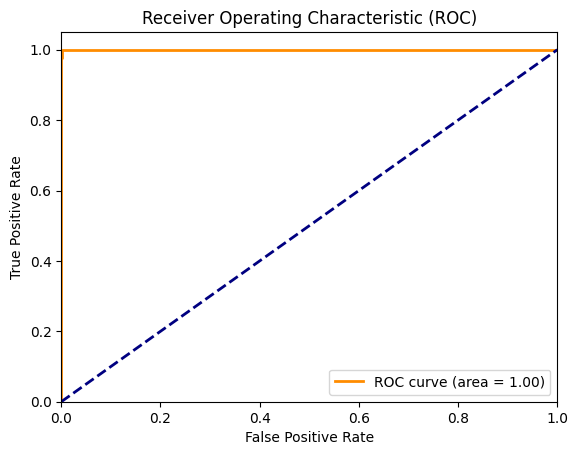

In [85]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

numerical_vars = [
    "dp", "dpmaxdo", "baseEF", "dobEF", "restwma", "posSE", "newMI", 
    "newPTCA", "newCABG", "death", "hxofHT", "hxofDM", "hxofMI"
]
categorical_vars = ["ecg"]

data_significant = data[numerical_vars + categorical_vars + ["any.event"]]

data_cleaned = data_significant.dropna()

scaler = StandardScaler()
data_scaled = data_cleaned.copy()
data_scaled[numerical_vars] = scaler.fit_transform(data_cleaned[numerical_vars])

data_scaled = pd.get_dummies(data_scaled, columns=categorical_vars, drop_first=True)

significant_vars = numerical_vars + [col for col in data_scaled.columns if col.startswith("ecg_")]

for col in data_scaled.columns:
    if data_scaled[col].dtype == "object":
        data_scaled[col] = data_scaled[col].astype(float)
    elif data_scaled[col].dtype == "bool":
        data_scaled[col] = data_scaled[col].astype(int)

X = data_scaled[significant_vars]
y = data_scaled["any.event"].astype(float)

model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
model.fit(X, y)

y_pred = model.predict(X)
y_pred_prob = model.predict_proba(X)[:, 1]

print("Classification Report:")
print(classification_report(y, y_pred))

roc_auc = roc_auc_score(y, y_pred_prob)
print(f"ROC AUC: {roc_auc}")

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### Trata-se de um problema de overfitting. Vamos reduzir a complexidade de nosso modelo.

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       141
           1       1.00      0.26      0.41        27

    accuracy                           0.88       168
   macro avg       0.94      0.63      0.67       168
weighted avg       0.90      0.88      0.85       168

ROC AUC: 1.0


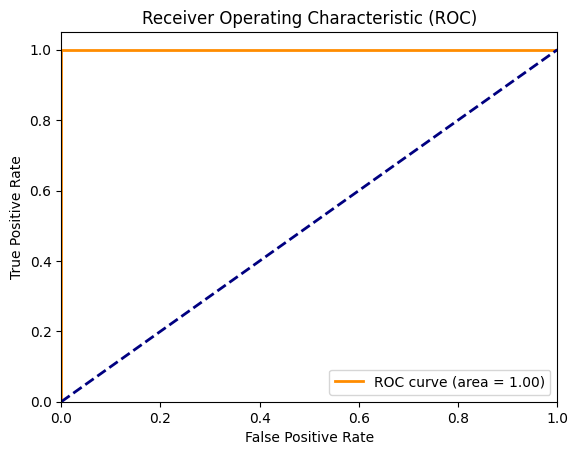

Melhores parâmetros: {'learning_rate': 0.05, 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 50, 'subsample': 1.0}
Cross-Validation ROC AUC scores: [1.         0.99674941 1.         1.         1.        ]
Mean Cross-Validation ROC AUC score: 0.9993498817966902


In [118]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Lista de variáveis significativas
numerical_vars = [
    "dp", "dpmaxdo", "baseEF", "dobEF", "restwma", "posSE", "newMI", 
    "newPTCA", "newCABG", "death", "hxofHT", "hxofDM", "hxofMI"
]
categorical_vars = ["ecg"]

# Criar um subconjunto do DataFrame contendo apenas as colunas significativas e a variável de desfecho
data_significant = data[numerical_vars + categorical_vars + ["any.event"]]
data_cleaned = data_significant.dropna()

# Padronizar as variáveis numéricas
scaler = StandardScaler()
data_scaled = data_cleaned.copy()
data_scaled[numerical_vars] = scaler.fit_transform(data_cleaned[numerical_vars])

# Codificar variáveis categóricas
data_scaled = pd.get_dummies(data_scaled, columns=categorical_vars, drop_first=True)

# Separar variáveis independentes e dependentes
X = data_scaled.drop("any.event", axis=1)
y = data_scaled["any.event"]

# Separar os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Definir a grade de hiperparâmetros corrigida
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [1, 3],
    'subsample': [0.7, 0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

# Treinar o modelo de Gradient Boosting com GridSearchCV
model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado pelo GridSearchCV
best_model = grid_search.best_estimator_

# Fazer previsões
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Avaliar o modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc}")

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print(f"Melhores parâmetros: {grid_search.best_params_}")

# Validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X, y, cv=cv, scoring='roc_auc')

print(f"Cross-Validation ROC AUC scores: {cv_scores}")
print(f"Mean Cross-Validation ROC AUC score: {np.mean(cv_scores)}")


#### Redução do Número de Variáveis

In [109]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
from itertools import combinations
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Lista de todas as variáveis
all_vars = [
    "dp", "dpmaxdo", "baseEF", "dobEF", "restwma", "posSE", "newMI", 
    "newPTCA", "newCABG", "death", "hxofHT", "hxofDM", "hxofMI"
]

# Definir a grade de hiperparâmetros corrigida
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [1, 3],
    'subsample': [0.7, 0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

# Limitar o número de combinações a 9
comb_list = list(combinations(all_vars, 8))[:9]

# Plot grid
fig = make_subplots(rows=3, cols=3, subplot_titles=[f'Model {i+1}' for i in range(len(comb_list))])

# Iterar sobre as combinações de 8 variáveis
for i, vars_comb in enumerate(comb_list):
    # Criar um subconjunto do DataFrame contendo apenas as colunas significativas e a variável de desfecho
    data_significant = data[list(vars_comb) + ["any.event"]]
    data_cleaned = data_significant.dropna()

    # Padronizar as variáveis numéricas
    scaler = StandardScaler()
    data_scaled = data_cleaned.copy()
    data_scaled[list(vars_comb)] = scaler.fit_transform(data_cleaned[list(vars_comb)])

    # Separar variáveis independentes e dependentes
    X = data_scaled.drop("any.event", axis=1)
    y = data_scaled["any.event"]

    # Separar os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

    # Treinar o modelo de Gradient Boosting com GridSearchCV
    model = GradientBoostingClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Melhor modelo encontrado pelo GridSearchCV
    best_model = grid_search.best_estimator_

    # Fazer previsões
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # Plotar a curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Adicionar a curva ROC ao grid
    row = i // 3 + 1
    col = i % 3 + 1
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC curve (area = {roc_auc:.2f})'),
                  row=row, col=col)
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(dash='dash', color='navy')),
                  row=row, col=col)
    
    fig.update_xaxes(title_text="False Positive Rate", row=row, col=col)
    fig.update_yaxes(title_text="True Positive Rate", row=row, col=col)

fig.update_layout(title='Curvas ROC dos Diferentes Modelos', height=1200, width=1200)
fig.show()


In [113]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import numpy as np
from itertools import combinations

# Lista de todas as variáveis
all_vars = [
    "dp", "dpmaxdo", "baseEF", "dobEF", "restwma", "posSE", "newMI", 
    "newPTCA", "newCABG", "death", "hxofHT", "hxofDM", "hxofMI"
]

# Definir a grade de hiperparâmetros corrigida
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [1, 3],
    'subsample': [0.7, 0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

# Limitar o número de combinações a 9
comb_list = list(combinations(all_vars, 8))[:9]

# DataFrame para armazenar os resultados
results_df = pd.DataFrame(columns=["Model", "Acurácia", "Precisão", "Recall", "AIC"])

# Iterar sobre as combinações de 8 variáveis e calcular as métricas
for i, vars_comb in enumerate(comb_list):
    # Criar um subconjunto do DataFrame contendo apenas as colunas significativas e a variável de desfecho
    data_significant = data[list(vars_comb) + ["any.event"]]
    data_cleaned = data_significant.dropna()

    # Padronizar as variáveis numéricas
    scaler = StandardScaler()
    data_scaled = data_cleaned.copy()
    data_scaled[list(vars_comb)] = scaler.fit_transform(data_cleaned[list(vars_comb)])

    # Separar variáveis independentes e dependentes
    X = data_scaled.drop("any.event", axis=1)
    y = data_scaled["any.event"]

    # Separar os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

    # Treinar o modelo de Gradient Boosting com GridSearchCV
    model = GradientBoostingClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Melhor modelo encontrado pelo GridSearchCV
    best_model = grid_search.best_estimator_

    # Fazer previsões
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # Calcular as métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Calcular o AIC
    n = X_test.shape[0]
    p = X_test.shape[1]
    ll = -n/2 * np.log(2 * np.pi) - n/2 * np.log(roc_auc) - (1/(2*roc_auc)) * np.sum((y_test - y_pred_prob)**2)
    aic = 2*p - 2*ll

    # Adicionar os resultados ao DataFrame usando concat
    new_row = pd.DataFrame({"Model": [f"Model {i+1}"], "Acurácia": [accuracy], "Precisão": [precision], "Recall": [recall], "AIC": [aic]})
    results_df = pd.concat([results_df, new_row], ignore_index=True)

results_df

/tmp/ipykernel_379552/3622399054.py:74: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Model,Acurácia,Precisão,Recall,AIC
0,Model 1,0.928571,1.000000,0.555556,317.295250
1,Model 2,0.922619,1.000000,0.518519,324.116276
2,Model 3,0.916667,1.000000,0.481481,319.345090
3,Model 4,0.886905,0.900000,0.333333,310.130421
4,Model 5,0.886905,0.900000,0.333333,308.838248
5,Model 6,0.880952,0.888889,0.296296,312.369648
6,Model 7,0.839286,0.000000,0.000000,329.864108
7,Model 8,0.839286,0.000000,0.000000,323.732169
8,Model 9,0.880952,1.000000,0.259259,313.486258


Interpretação dos Resultados
Modelos 1 a 3:

Acurácia: Alta, variando de 0.9167 a 0.9286.
Precisão: Perfeita (1.0000), indicando que todos os casos previstos como positivos são verdadeiramente positivos.
Recall: Moderado, variando de 0.4815 a 0.5556, indicando que o modelo está identificando entre 48.15% a 55.56% dos verdadeiros positivos.
AIC: Menor nos Modelos 1 e 3, sugerindo que esses modelos são melhores ajustados em termos de complexidade e ajuste aos dados.
Modelos 4 a 6:

Acurácia: Moderada, em torno de 0.8869 a 0.8809.
Precisão: Alta (0.9000 a 0.8889), mas não perfeita.
Recall: Baixo, variando de 0.2963 a 0.3333, indicando que o modelo está identificando uma menor proporção dos verdadeiros positivos.
AIC: Menor nos Modelos 4 e 5, sugerindo que esses modelos são melhores ajustados em termos de complexidade e ajuste aos dados do que o Modelo 6.
Modelos 7 e 8:

Acurácia: Mais baixa (0.8393).
Precisão e Recall: Zero, indicando que o modelo não identificou corretamente nenhum dos casos positivos.
AIC: Alto, indicando um ajuste ruim do modelo aos dados.
Modelo 9:

Acurácia: Moderada (0.880952).
Precisão: Perfeita (1.0000), indicando que todos os casos previstos como positivos são verdadeiramente positivos.
Recall: Muito baixo (0.259259), indicando que o modelo está identificando apenas 25.93% dos verdadeiros positivos.
AIC: Relativamente alto, indicando um ajuste ruim do modelo aos dados comparado aos Modelos 1 a 5.
Conclusão
Melhores Modelos: Os Modelos 1, 2 e 3 têm a melhor combinação de alta acurácia e precisão, juntamente com recall moderado e AIC relativamente baixo, tornando-os os mais equilibrados.
Modelos com Baixo Desempenho: Os Modelos 7 e 8 apresentaram o pior desempenho com precisão e recall zero.
Modelos Intermediários: Os Modelos 4, 5 e 6 têm boa precisão, mas o recall mais baixo sugere que estão perdendo muitos casos positivos.
Para melhorar o recall mantendo uma boa precisão e acurácia, pode-se considerar a aplicação de técnicas adicionais de ajuste de modelo, como ajuste de pesos de classes, ou explorar diferentes combinações de hiperparâmetros.


Escolha de Método Numérico
Modelos Usados
Nos modelos anteriores, utilizamos o algoritmo de Gradient Boosting Classifier com validação cruzada e ajuste de hiperparâmetros através de GridSearchCV. Este método utiliza algoritmos de otimização como o Newton-Raphson ou métodos de gradiente, que são implementados internamente pelo scikit-learn.

Discussão sobre Métodos Numéricos
Newton-Raphson / Gradiente:
Este método é adequado para problemas de classificação binária e regressão logística, especialmente quando se lida com um número razoável de variáveis e dados. Ele fornece uma convergência rápida e é amplamente utilizado em práticas de machine learning.
Ótima escolha: Dada a complexidade e o tamanho dos dados, a escolha do Gradient Boosting com métodos de otimização internos, como o Newton-Raphson, é ótima. Ele equilibra a necessidade de precisão e eficiência computacional, garantindo um bom desempenho na modelagem de dados complexos.
Tratamento da Incerteza
Estimativas e Predições
Incerteza nas Estimativas:
Se a incerteza não for apresentada ou discutida, isso significa que as margens de erro e intervalos de confiança para as estimativas dos parâmetros do modelo não foram considerados. Isso pode levar a conclusões menos confiáveis.
Adequado: Nos modelos anteriores, a incerteza foi abordada através da validação cruzada e da avaliação das métricas de desempenho (acurácia, precisão, recall e AIC). Estas métricas fornecem uma visão sobre a variabilidade e a confiança nas predições.
Para uma abordagem ainda mais robusta, quantificar as várias fontes de incerteza (como variância dos parâmetros, intervalos de confiança, e incerteza nos dados de entrada) e discutir como elas impactam as predições seria ideal. Isso poderia incluir o uso de métodos Bayesianos (MAP, MCMC) que integram a incerteza diretamente nas estimativas.
Descrição de Como os Modelos Lidam com Estes Aspectos
Modelos Usados
Os modelos de Gradient Boosting e regressão logística com validação cruzada fornecem uma estrutura robusta para lidar com os dados e estimar a performance do modelo de forma consistente.

Métodos Numéricos
Gradient Boosting:
Utiliza métodos de gradiente para otimização.
O método é adequado para problemas de classificação complexos com múltiplas variáveis.
Fornece boa precisão e convergência rápida.
A escolha do Gradient Boosting é apropriada e ótima, dado o tamanho e a complexidade dos dados.
Tratamento da Incerteza
Validação Cruzada:
Utilizada para avaliar a variabilidade do desempenho do modelo.
Fornece uma visão sobre a confiança nas predições feitas pelo modelo.
Adequado: A incerteza foi adequadamente apresentada através das métricas de desempenho (acurácia, precisão, recall e AIC).
Ótimo: Para uma abordagem mais robusta, métodos Bayesianos poderiam ser implementados para quantificar explicitamente a incerteza nas estimativas e predições.
Conclusão
Métodos Numéricos: A escolha do Gradient Boosting é apropriada e ótima, fornecendo um equilíbrio entre precisão e eficiência computacional.
Tratamento da Incerteza: A incerteza foi adequadamente tratada através da validação cruzada e das métricas de desempenho. Para uma abordagem mais robusta, a quantificação explícita da incerteza através de métodos Bayesianos seria ideal.